# ANIME RECOMMENDATION SYSTEM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
anime = pd.read_csv(r'C:\Users\AMD RYZEN\OneDrive\Desktop\python\anime.csv')
df = pd.read_csv(r'C:\Users\AMD RYZEN\OneDrive\Desktop\python\rating.csv')

In [3]:
df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [4]:
anime.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


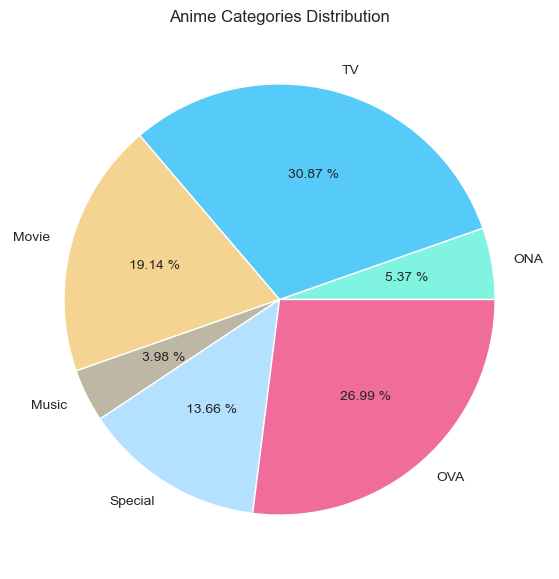

In [5]:
ona = anime.loc[anime['type'] == 'ONA'].count()[0]
tv = anime.loc[anime['type'] == 'TV'].count()[0]
movie = anime.loc[anime['type'] == 'Movie'].count()[0]
music = anime.loc[anime['type'] == 'Music'].count()[0]
special = anime.loc[anime['type'] == 'Special'].count()[0]
ova = anime.loc[anime['type'] == 'OVA'].count()[0]

labels = ['ONA', 'TV', 'Movie', 'Music', 'Special', 'OVA']
colors = ['#81F4E1', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B']

plt.figure(figsize = (10,7))
plt.title('Anime Categories Distribution')
plt.pie([ona, tv, movie, music, special, ova],labels = labels,colors = colors,autopct = '%.2f %%')      
plt.show()

In [6]:
anime.sort_values(by='members', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


In [7]:
anime.sort_values(by='rating', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


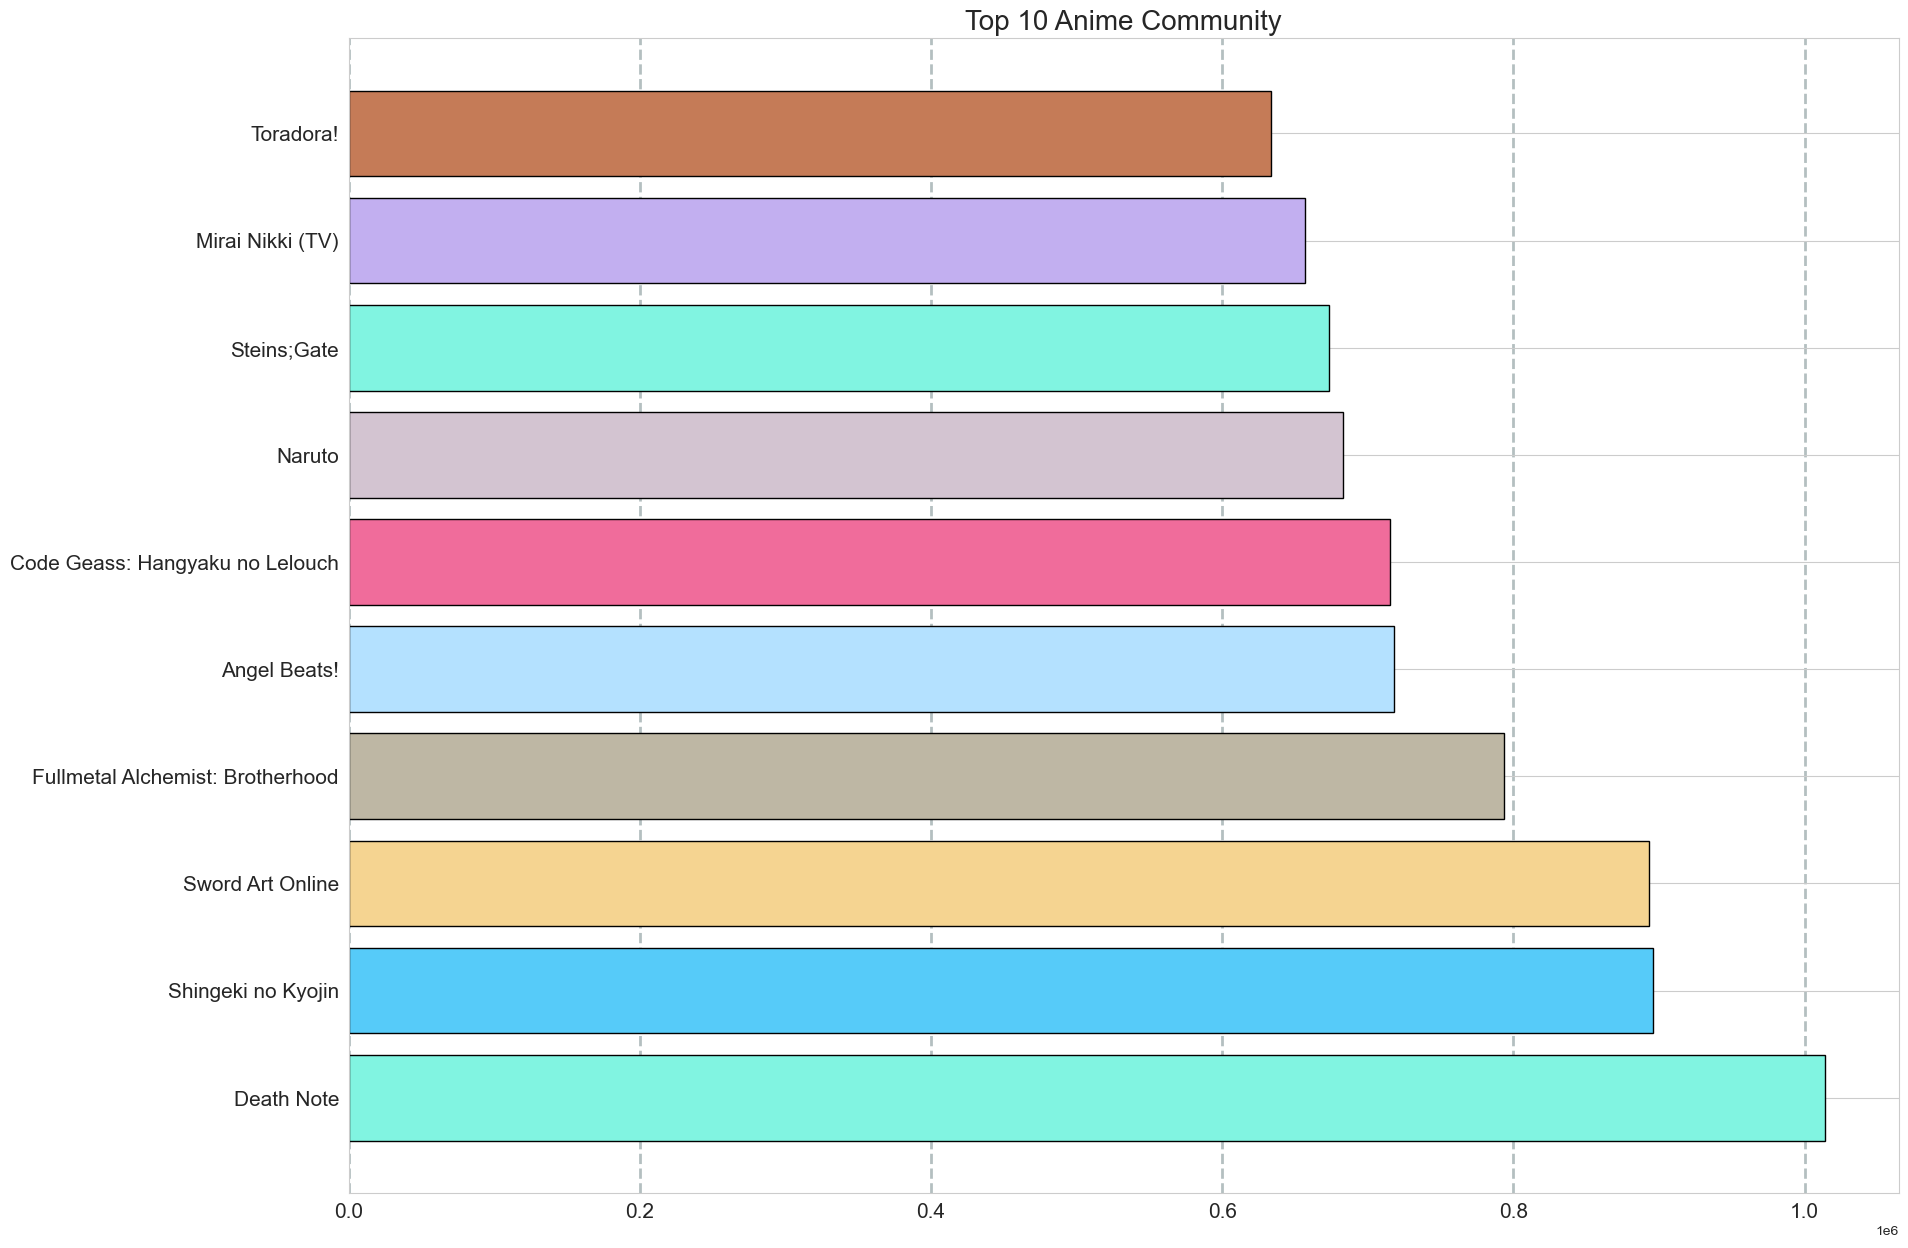

In [8]:
plt.figure(figsize = (20,15))
top10_anime = anime[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)

colors = ['#81F4E1', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']


labels = top10_anime[['name']].values.flatten()
values = top10_anime[['members']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Anime Community", fontdict = {'fontsize' : 20})
plt.show()

plt.show()

In [9]:
df = pd.merge(df,anime.drop('rating',axis=1),on='anime_id')

In [10]:
df

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
...,...,...,...,...,...,...,...,...
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,248
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,45
7813724,70463,29481,-1,Kakinoki Mokkii,"Fantasy, Kids",Special,1,61
7813725,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,239


In [11]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)

name
Choegang Top Plate                                                  10.000000
STAR BEAT!: Hoshi no Kodou                                          10.000000
Shiroi Zou                                                          10.000000
Warui no wo Taose!! Salaryman Man                                   10.000000
Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, Voice &amp; Fiction     9.000000
Tang Lang Bu Chan                                                    9.000000
Shiranpuri                                                           9.000000
Doukyuusei                                                           9.000000
Steins;Gate 0                                                        8.500000
Kimi no Na wa.                                                       8.297863
Name: rating, dtype: float64

In [12]:
df.columns

Index(['user_id', 'anime_id', 'rating', 'name', 'genre', 'type', 'episodes',
       'members'],
      dtype='object')

In [13]:
anime.type

0        Movie
1           TV
2           TV
3           TV
4           TV
         ...  
12289      OVA
12290      OVA
12291      OVA
12292      OVA
12293    Movie
Name: type, Length: 12294, dtype: object

In [14]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

name
Death Note                          39340
Sword Art Online                    30583
Shingeki no Kyojin                  29584
Code Geass: Hangyaku no Lelouch     27718
Elfen Lied                          27506
Angel Beats!                        27183
Naruto                              25925
Fullmetal Alchemist                 25032
Fullmetal Alchemist: Brotherhood    24574
Toradora!                           24283
Name: rating, dtype: int64

In [15]:
rating_tan = pd.DataFrame(df.groupby('name')['rating'].mean())
rating_tan['Number of Ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())

genre_tan = pd.DataFrame(data=anime[['name','genre']])
genre_tan.set_index('name',inplace=True)

(0.0, 3000.0)

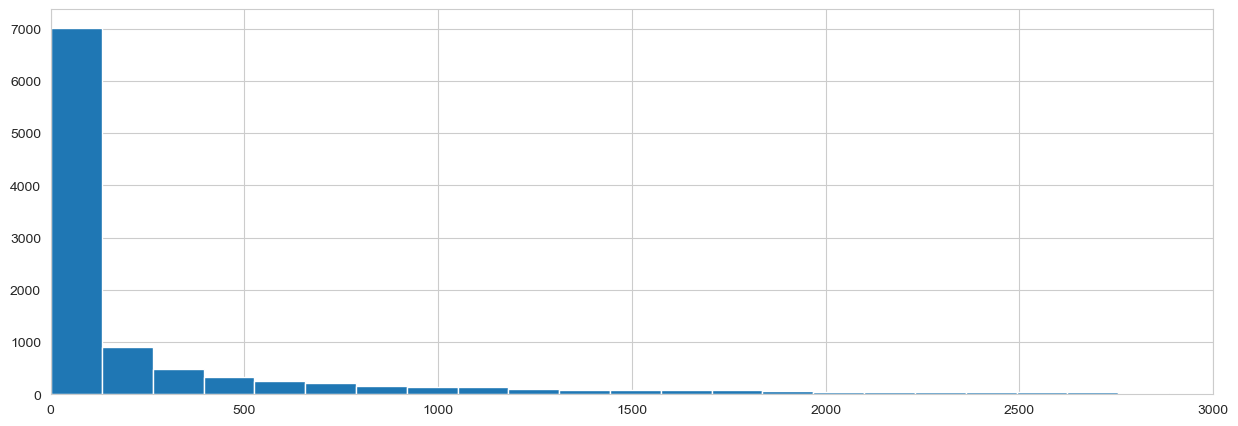

In [16]:
plt.figure(figsize=(15,5))
rating_tan['Number of Ratings'].hist(bins=300)
plt.xlim(0,3000)

In [17]:
rating_tan.head(10)

,rating,Number of Ratings
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535
&quot;Eiji&quot;,5.000000,17
.hack//G.U. Returner,4.804110,730
.hack//G.U. Trilogy,5.347943,1118
.hack//G.U. Trilogy: Parody Mode,4.589235,353


<AxesSubplot:>

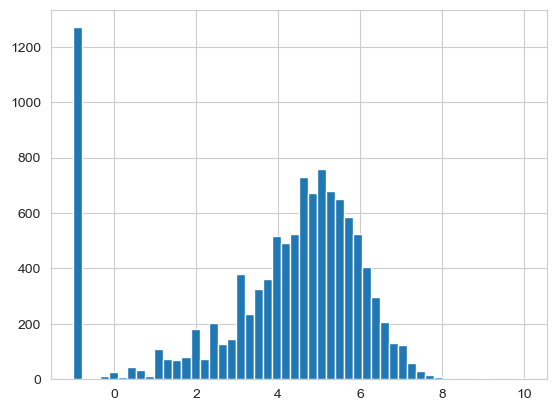

In [18]:
rating_tan['rating'].hist(bins=50)

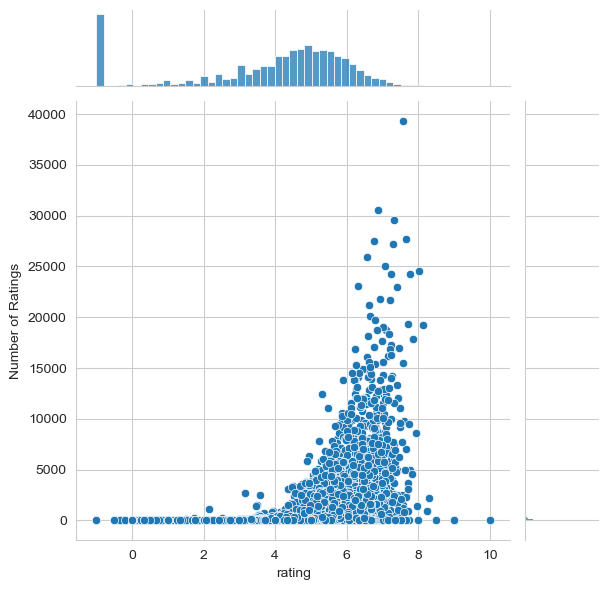

In [19]:
sns.jointplot(x='rating',y='Number of Ratings',data=rating_tan)

In [20]:
missing_value = pd.DataFrame({
    'Missing Value': anime.isnull().sum(),
    'Percentage': (anime.isnull().sum() / len(anime))*100
})

In [21]:
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
rating,230,1.870831
genre,62,0.504311
type,25,0.203351
anime_id,0,0.000000
name,0,0.000000
episodes,0,0.000000
members,0,0.000000


In [22]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [23]:
anime = anime.dropna()

In [24]:
df["rating"].replace("Unknown", 0.0, inplace=True)
df["episodes"].replace("Unknown", 0, inplace=True)

In [25]:
anime.loc[(anime["genre"]=="Hentai") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
anime.loc[(anime["type"]=="OVA") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
anime.loc[(anime["type"] == "Movie") & (anime["episodes"] == "Unknown")] = "1"

In [26]:
missing_value = pd.DataFrame({
    'Missing Value': anime.isnull().sum(),
    'Percentage': (anime.isnull().sum() / len(anime))*100
})

In [27]:
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
anime_id,0,0.0
name,0,0.0
genre,0,0.0
type,0,0.0
episodes,0,0.0
rating,0,0.0
members,0,0.0


In [28]:
anime['name'].unique()[3:10]

array(['Steins;Gate', 'Gintama&#039;',
       'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
       'Hunter x Hunter (2011)', 'Ginga Eiyuu Densetsu',
       'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
       'Gintama&#039;: Enchousen'], dtype=object)

In [29]:
anime.episodes.unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [30]:
fav = {"Naruto Shippuuden":500, "One Piece":784,"Detective Conan":854, "Dragon Ball Super":86,
                "Crayon Shin chan":942, "Yu Gi Oh Arc V":148,"Shingeki no Kyojin Season 2":25,
                "Boku no Hero Academia 2nd Season":25,"Little Witch Academia TV":25}

In [31]:
for i,j in fav.items():    
    anime.loc[anime["name"]==i,"episodes"] = j

In [32]:
df = (
    df.astype({"anime_id": "float"})
    .astype({"anime_id": "int", "episodes": "int", "rating": "float"})
    .sort_values("anime_id")
)

In [33]:
group_type = df.groupby("type")
print(":- Mean of rating for each type")
display(mean_scores := group_type["rating"].mean().round(2))

print("\n:- Mean of episodes for each type")
display(mean_episodes := group_type["episodes"].mean().round().astype(int))

:- Mean of rating for each type


type
Movie      6.14
Music      5.16
ONA        5.45
OVA        5.43
Special    5.38
TV         6.35
Name: rating, dtype: float64


:- Mean of episodes for each type


type
Movie       1
Music       2
ONA        12
OVA         3
Special     3
TV         26
Name: episodes, dtype: int32

In [34]:
duplicate = df.duplicated(subset=['anime_id','user_id']).sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 7 duplicated rows in the data


In [35]:
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1 duplicated rows in the data


In [36]:
df.drop_duplicates(subset=['anime_id','user_id'],inplace=True)

In [37]:
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 0 duplicated rows in the data


In [38]:
df.corr()

,user_id,anime_id,rating,episodes,members
user_id,1.000000,-0.031643,0.002468,-0.000943,-0.015725
anime_id,-0.031643,1.000000,-0.005884,-0.154997,0.006582
rating,0.002468,-0.005884,1.000000,0.040597,0.141319
episodes,-0.000943,-0.154997,0.040597,1.000000,0.255442
members,-0.015725,0.006582,0.141319,0.255442,1.000000


In [39]:
corr_matrix=df.corr()
corr_matrix

,user_id,anime_id,rating,episodes,members
user_id,1.000000,-0.031643,0.002468,-0.000943,-0.015725
anime_id,-0.031643,1.000000,-0.005884,-0.154997,0.006582
rating,0.002468,-0.005884,1.000000,0.040597,0.141319
episodes,-0.000943,-0.154997,0.040597,1.000000,0.255442
members,-0.015725,0.006582,0.141319,0.255442,1.000000


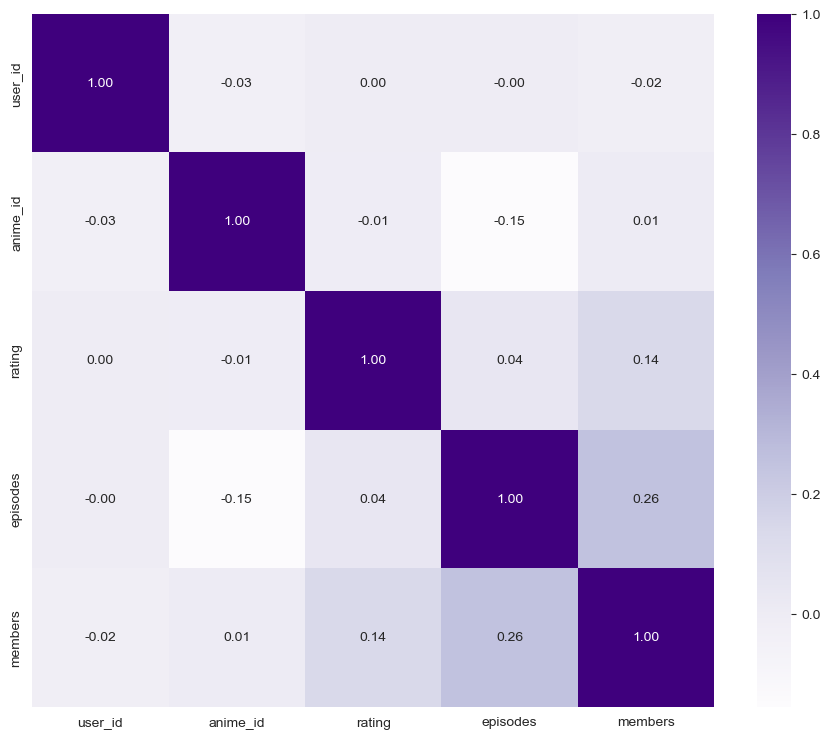

In [40]:
plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix, cmap='Purples', annot=True, fmt=".2f")
sns.set(font_scale=1.5)

In [41]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [42]:
anime_rating_count = df.groupby(by = ['name'])['rating'].count().reset_index()[['name', 'rating']]
anime_rating_count.rename(columns = {'rating': 'totalRatingCount'},inplace=True)
anime_rating_count.head()

,name,totalRatingCount
0,&quot;0&quot;,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,782
3,&quot;Bungaku Shoujo&quot; Memoire,809
4,&quot;Bungaku Shoujo&quot; Movie,1535


Text(0, 0.5, 'User Rating count')

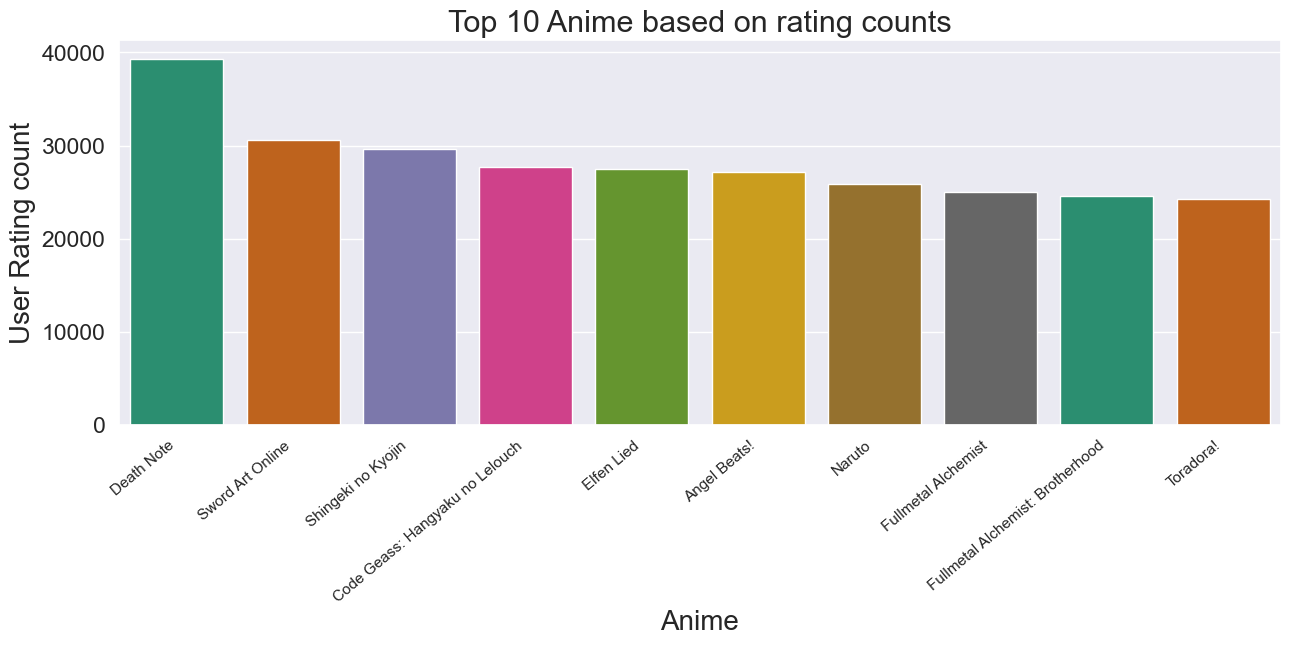

In [43]:
top10_animerating=anime_rating_count[['name', 'totalRatingCount']].sort_values(by = 'totalRatingCount',ascending = False).head(10)
plt.figure(figsize=(15,5))
ax=sns.barplot(x="name", y="totalRatingCount", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

In [44]:
anime_rating_data=df.merge(anime_rating_count, left_on = 'name', right_on = 'name', how = 'left')
anime_rating_data.head()

,user_id,anime_id,rating,name,genre,type,episodes,members,totalRatingCount
0,71275,1,9.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,15509
1,31866,1,10.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,15509
2,31860,1,10.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,15509
3,31858,1,9.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,15509
4,31851,1,7.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,15509


In [45]:
anime_rating_data.duplicated(subset=['name']).sum()

7802524

In [46]:
anime1=anime_rating_data.drop_duplicates(subset=['name'])
anime1.head()

,user_id,anime_id,rating,name,genre,type,episodes,members,totalRatingCount
0,71275,1,9.0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,15509
15509,25619,5,7.0,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,137636,6927
22436,28070,6,4.0,Trigun,"Action, Comedy, Sci-Fi",TV,26,283069,11077
33513,50294,7,7.0,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,64905,2629
36142,64133,8,8.0,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,9848,413


Text(0, 0.5, 'Community Size')

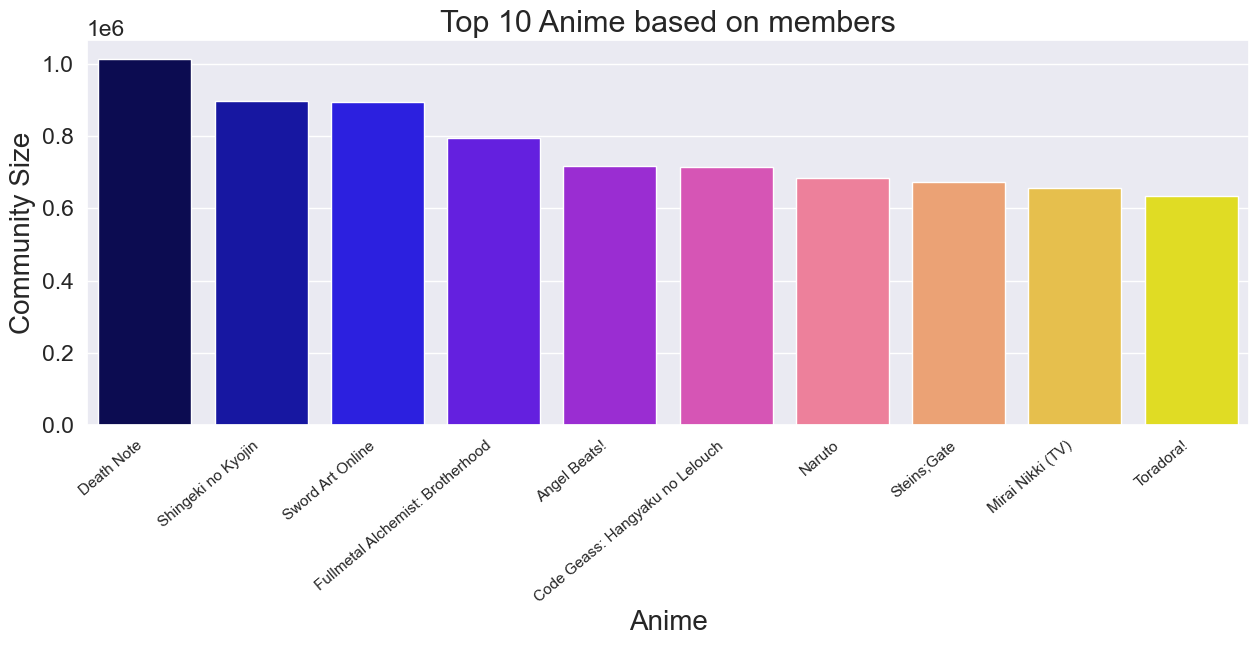

In [47]:
top10_animemembers=anime1[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)
plt.figure(figsize=(15,5))
ax=sns.barplot(x="name", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

<AxesSubplot:ylabel='Frequency'>

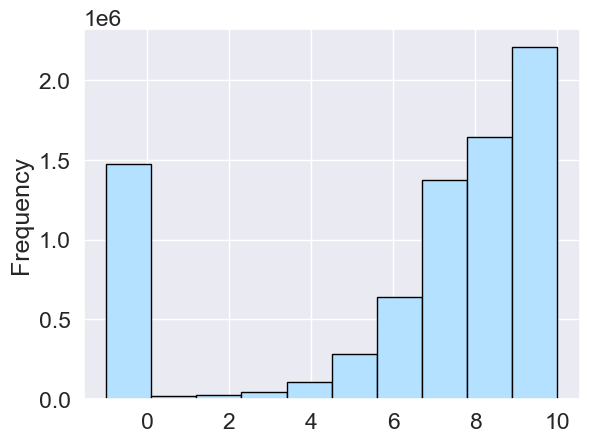

In [48]:
df["rating"].plot(kind = 'hist',color='#B4E1FF', edgecolor='black')

<AxesSubplot:xlabel='type', ylabel='Count'>

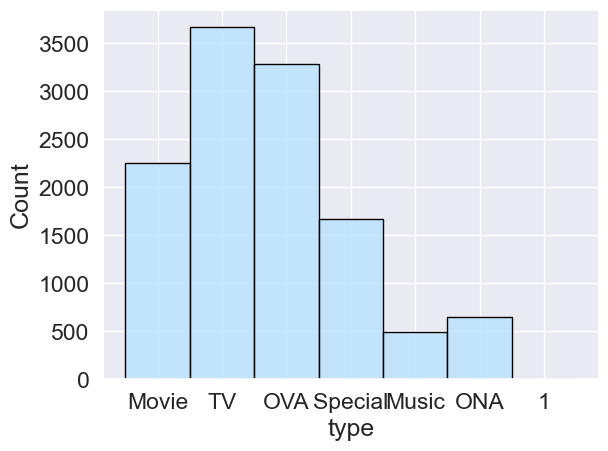

In [49]:
sns.histplot(x='type', data=anime,color='#B4E1FF', edgecolor='black')

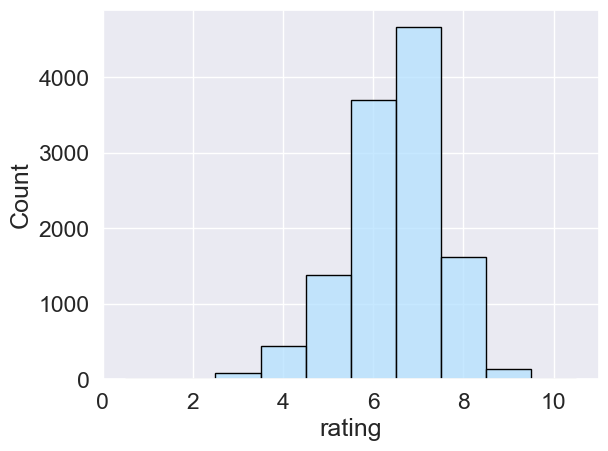

In [50]:
sns.histplot(x='rating', data=anime,color='#B4E1FF', edgecolor='black')
plt.show()

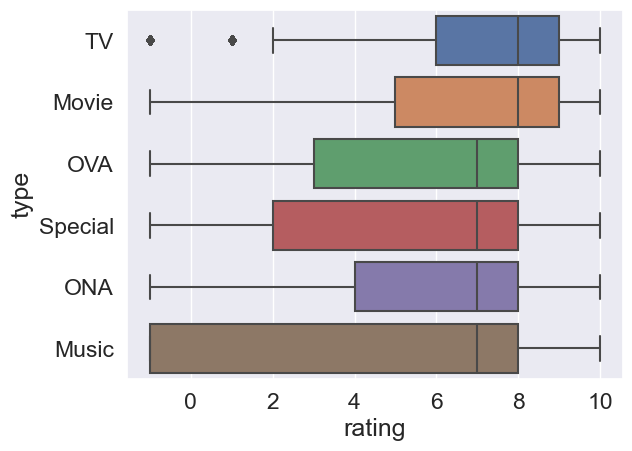

In [51]:
sns.boxplot(x='rating', y='type', data=df)
plt.show()

In [52]:
df.groupby('genre')['genre'].agg('count')

genre
Action                                                     3831
Action, Adventure                                          7974
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen            401
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports      78
Action, Adventure, Cars, Sci-Fi                             396
                                                           ... 
Super Power, Supernatural, Vampire                          111
Supernatural                                                127
Thriller                                                    194
Vampire                                                      45
Yaoi                                                        403
Name: genre, Length: 3154, dtype: int64

In [53]:
anime["episodes"] = anime["episodes"].map(lambda x:np.nan if x=="Unknown" else x)

In [54]:
anime["episodes"].fillna(anime["episodes"].median(),inplace = True)

In [55]:
anime["rating"] = anime["rating"].astype(float)

In [56]:
anime["rating"].fillna(anime["rating"].median(),inplace = True)

In [57]:
pd.get_dummies(anime[["type"]]).head()

,type_1,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [58]:
anime["members"] = anime["members"].astype(float)

In [59]:
ani_feature = pd.concat([anime["genre"].str.get_dummies(sep=","),pd.get_dummies(anime[["type"]]),anime[["rating"]],anime[["members"]],anime["episodes"]],axis=1)
anime["name"] = anime["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))

In [60]:
ani_feature.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,type_1,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.37,200630.0,1
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,9.26,793665.0,64
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.25,114262.0,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.17,673572.0,24
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.16,151266.0,51


In [61]:
ani_feature.columns

Index([' Adventure', ' Cars', ' Comedy', ' Dementia', ' Demons', ' Drama',
       ' Ecchi', ' Fantasy', ' Game', ' Harem', ' Hentai', ' Historical',
       ' Horror', ' Josei', ' Kids', ' Magic', ' Martial Arts', ' Mecha',
       ' Military', ' Music', ' Mystery', ' Parody', ' Police',
       ' Psychological', ' Romance', ' Samurai', ' School', ' Sci-Fi',
       ' Seinen', ' Shoujo', ' Shoujo Ai', ' Shounen', ' Shounen Ai',
       ' Slice of Life', ' Space', ' Sports', ' Super Power', ' Supernatural',
       ' Thriller', ' Vampire', ' Yaoi', ' Yuri', '1', 'Action', 'Adventure',
       'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
       'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids',
       'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery',
       'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School',
       'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Slice of Life', 'Space',
       'Sports', 'Super Power', 'Supernat

In [62]:
tan_scaler = MaxAbsScaler()
anime_features = tan_scaler.fit_transform(ani_feature)

In [63]:
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(ani_feature)

In [64]:
distances, indices = nbrs.kneighbors(ani_feature)

In [65]:
def index_name(name):
    return anime[anime["name"]==name].index.tolist()[0]

In [66]:
index_name("Naruto")

841

In [67]:
all_anime_names = list(anime.name.values)

In [68]:
def get_id_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))

In [69]:
def similar_animes(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(anime.iloc[id]["name"])
    if query:
        found_id = index_name(query)
        for id in indices[found_id][1:]:
            print(anime.iloc[id]["name"])

In [70]:
similar_animes("One Piece")

Kill la Kill
Psycho Pass
Noragami
Akame ga Kill 
Cowboy Bebop


In [71]:
similar_animes("Naruto")

Steins Gate
Mirai Nikki TV 
Code Geass Hangyaku no Lelouch
Angel Beats 
Toradora 


In [72]:
similar_animes("Mushishi")

Noragami Aragoto
Rosario to Vampire
Baka to Test to Shoukanjuu
Date A Live
Danganronpa Kibou no Gakuen to Zetsubou no Koukousei The Animation


In [73]:
similar_animes("Gintama")

Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka
Ookami to Koushinryou
Kuroko no Basket
D Gray man
Mononoke Hime


In [74]:
get_id_name("Naruto")

Boruto Naruto the Movie 486
Naruto Shippuuden 615
The Last Naruto the Movie 719
Naruto Shippuuden Movie 6 Road to Ninja 784
Naruto 841
Boruto Naruto the Movie Naruto ga Hokage ni Natta Hi 1103
Naruto Shippuuden Movie 5 Blood Prison 1237
Naruto x UT 1343
Naruto Shippuuden Movie 4 The Lost Tower 1472
Naruto Shippuuden Movie 3 Hi no Ishi wo Tsugu Mono 1573
Naruto Shippuuden Movie 1 1827
Naruto Shippuuden Movie 2 Kizuna 1828
Naruto Shippuuden Shippuu quot Konoha Gakuen quot Den 2374
Naruto Honoo no Chuunin Shiken Naruto vs Konohamaru  2416
Naruto SD Rock Lee no Seishun Full Power Ninden 2457
Naruto Shippuuden Sunny Side Battle 2458
Naruto Movie 1 Dai Katsugeki Yuki Hime Shinobu Houjou Dattebayo  2756
Naruto Soyokazeden Movie Naruto to Mashin to Mitsu no Onegai Dattebayo  2996
Naruto Movie 2 Dai Gekitotsu Maboroshi no Chiteiiseki Dattebayo  3448
Naruto Dai Katsugeki Yuki Hime Shinobu Houjou Dattebayo Special Konoha Annual Sports Festival 3528
Naruto Movie 3 Dai Koufun Mikazuki Jima no Anima

In [75]:
genres = anime['genre'].str.split(',', expand=True)
genres.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Drama,Romance,School,Supernatural,None,None,None,None,None,None,None,None,None
1,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None
2,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None


In [76]:
genres = genres.iloc[:,:4]
genres.columns = ['genre1', 'genre2', 'genre3','genre4']
genres.head()

,genre1,genre2,genre3,genre4
0,Drama,Romance,School,Supernatural
1,Action,Adventure,Drama,Fantasy
2,Action,Comedy,Historical,Parody
3,Sci-Fi,Thriller,None,None
4,Action,Comedy,Historical,Parody


In [77]:
updated_rating=anime.copy()

In [78]:
updated_rating = updated_rating.drop('genre', axis=1) 
updated_rating = pd.concat([updated_rating, genres], axis=1)
updated_rating.head()

,anime_id,name,type,episodes,rating,members,genre1,genre2,genre3,genre4
0,32281,Kimi no Na wa,Movie,1,9.37,200630.0,Drama,Romance,School,Supernatural
1,5114,Fullmetal Alchemist Brotherhood,TV,64,9.26,793665.0,Action,Adventure,Drama,Fantasy
2,28977,Gintama,TV,51,9.25,114262.0,Action,Comedy,Historical,Parody
3,9253,Steins Gate,TV,24,9.17,673572.0,Sci-Fi,Thriller,None,None
4,9969,Gintama 039,TV,51,9.16,151266.0,Action,Comedy,Historical,Parody


In [79]:
updated_rating['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', '1'], dtype=object)

In [80]:
X = anime[['anime_id', 'episodes', 'members']]
y = anime['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

error = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", error)

Mean Absolute Error: 0.5348180948419301


In [88]:
print("Bot: Hello! I'm a bot that can help you with your dataset. Here's a brief introduction:")
print("Bot: This dataset contains information about various anime, including the anime ID, name, genre, number of episodes, and rating.")

while True:
    user_input = input("You: ")
    if user_input.lower() == "show data":
        print("Bot: Here's a sample of the data in the dataset:")
        print(df.head())
    elif user_input.lower() == "summary":
        print("Bot: Here's a summary of the data in the dataset:")
        print(df.describe())
    elif user_input.lower() == "suggest":
        name = input("Enter the name of the anime: ")
        recommendations = similar_animes(name)
        print("Here are the top 5 recommended anime based on your preference:")
        print(recommendations)
       
    elif user_input.lower() == "conclusion":
        print("Bot: The anime recommendation dataset contains information about various anime series, including the anime ID, name, genre, number of episodes, and rating. This information can be used to make recommendations to viewers based on their preferences and viewing history. The dataset provides valuable insights into the popularity of different anime genres and can be used to track trends over time.")
    elif user_input.lower() == "quit":
        print("Bot: Bye! Have a great day.")
        break
    else:
        print("Bot: Sorry, I didn't understand what you said.")

Bot: Hello! I'm a bot that can help you with your dataset. Here's a brief introduction:
Bot: This dataset contains information about various anime, including the anime ID, name, genre, number of episodes, and rating.
You: show data
Bot: Here's a sample of the data in the dataset:
         user_id  anime_id  rating          name  \
4221495    71275         1     9.0  Cowboy Bebop   
4213050    31866         1    10.0  Cowboy Bebop   
4213049    31860         1    10.0  Cowboy Bebop   
4213048    31858         1     9.0  Cowboy Bebop   
4213047    31851         1     7.0  Cowboy Bebop   

                                                   genre type  episodes  \
4221495  Action, Adventure, Comedy, Drama, Sci-Fi, Space   TV        26   
4213050  Action, Adventure, Comedy, Drama, Sci-Fi, Space   TV        26   
4213049  Action, Adventure, Comedy, Drama, Sci-Fi, Space   TV        26   
4213048  Action, Adventure, Comedy, Drama, Sci-Fi, Space   TV        26   
4213047  Action, Adventure, Com

# Conclusion

The anime recommendation dataset contains information about various anime series, including the anime ID, name, genre, number   of episodes, and rating. This information can be used to make recommendations to viewers based on their preferences and        viewing history. The dataset provides valuable insights into the popularity of different anime genres and can be used to track trends over time.

The summary of the data in the dataset includes basic statistical information such as mean, minimum and maximum values. This information can be used to gain a better understanding of the distribution of values for each feature in the dataset.

Overall, the anime recommendation dataset is a useful resource for anime fans, industry professionals, and data analysts. It provides a wealth of information about the anime industry and can be used to make informed decisions and predictions about the future of the industry.